In [2]:
# import libraries
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Permite ver todo el valor del df
#pd.set_option('display.max_rows', None)
sns.set()

In [34]:
# SE INGRESA EL CODIGO DE LA ACCION
ticker = "MSFT" # EL CODIGO SE PUEDE CONSULTAR EN
msft = yf.Ticker("MSFT")

In [2]:
## OBTIENE TODA LA INFORMACION DE UNA ACCION A PARTIR DE SU SIMBOLO
## COLOCAR UNA MARCA CON LA FECHA DEL DIA ACTUAL, COLOCAR FORMATO Y OTRAS COSAS
ticker = "MSFT"

print("INFORMACION FINANCIERA DE : " + ticker + " AL DIA DE :")
print("\n")

def ObtenerInformacion(ticker):
    ticker = yf.Ticker(ticker)
    for keys, values in ticker.info.items():
        # Imprime en el formato necesario la informacion de los principales ejecutivos
        if str(keys) == 'companyOfficers':
            print('companyOfficers:')
            for exec in range(0,len(ticker.info["companyOfficers"])): #** OJO: AQUI VIENE UNA LISTA CON LOS EJECUTIVOS PRINCIPALES ***/
                for keys1,values1 in ticker.info["companyOfficers"][exec].items():
                    print("         "+str(keys1) + ": " + str(values1))
                print("\n")    
        # imprime el diccionario normalmente
        else:
            print(str(keys) + ": " + str(values))
#for keys1,values1 in ticker.info["companyOfficers"][exec]:

ObtenerInformacion(ticker=ticker)

INFORMACION FINANCIERA DE : MSFT AL DIA DE :


address1: One Microsoft Way
city: Redmond
state: WA
zip: 98052-6399
country: United States
phone: 425 882 8080
website: https://www.microsoft.com
industry: Software - Infrastructure
industryKey: software-infrastructure
industryDisp: Software - Infrastructure
sector: Technology
sectorKey: technology
sectorDisp: Technology
longBusinessSummary: Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and power automate; and on-pr

In [25]:
# FUNCION QUE GRAFICA EL COMPORTAMIENTO DE UN PERIODO DETERMINADO DE LA ACCION CONSULTADA

ticker = "MSFT"

def ObtenerPeriodo(ticker,number): ##PARA TENER EN CONSIDERACION ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
    ticker_ob = yf.Ticker(ticker)
    per = str(number)
    hist = ticker_ob.history(period=str(per))
    # Se puede hacer un grafico para ver como se ha comportado
    df_hist = pd.DataFrame(data=hist)
    # print(df_hist)
    # Genera visualizacion
    sns.lineplot(df_hist, x=df_hist.index, y=df_hist['Close'])
    # Format
    plt.suptitle("Valor de " + ticker + " en dólares (Cierre sesión). Periodo: " + per)
    plt.ylabel("Valor de " + ticker + " en dólares (Cierre sesión).")
    plt.xlabel("Fecha(AAAAMM)")
    # Show
    plt.show()

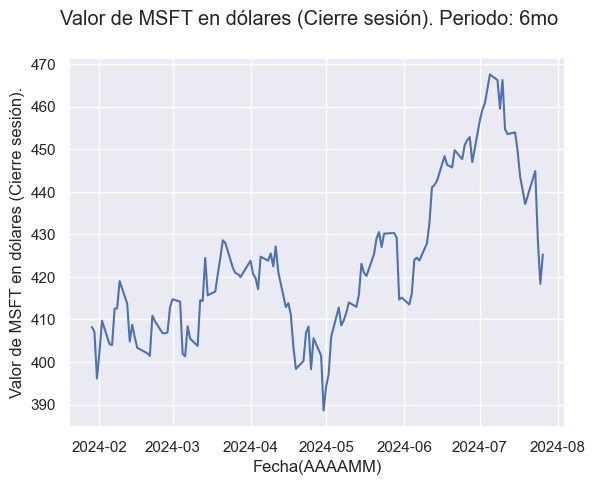

In [26]:
ObtenerPeriodo(ticker,'6mo')

In [21]:
ObtenerPeriodoStock(ticker,'6mo').index

pandas.core.indexes.datetimes.DatetimeIndex

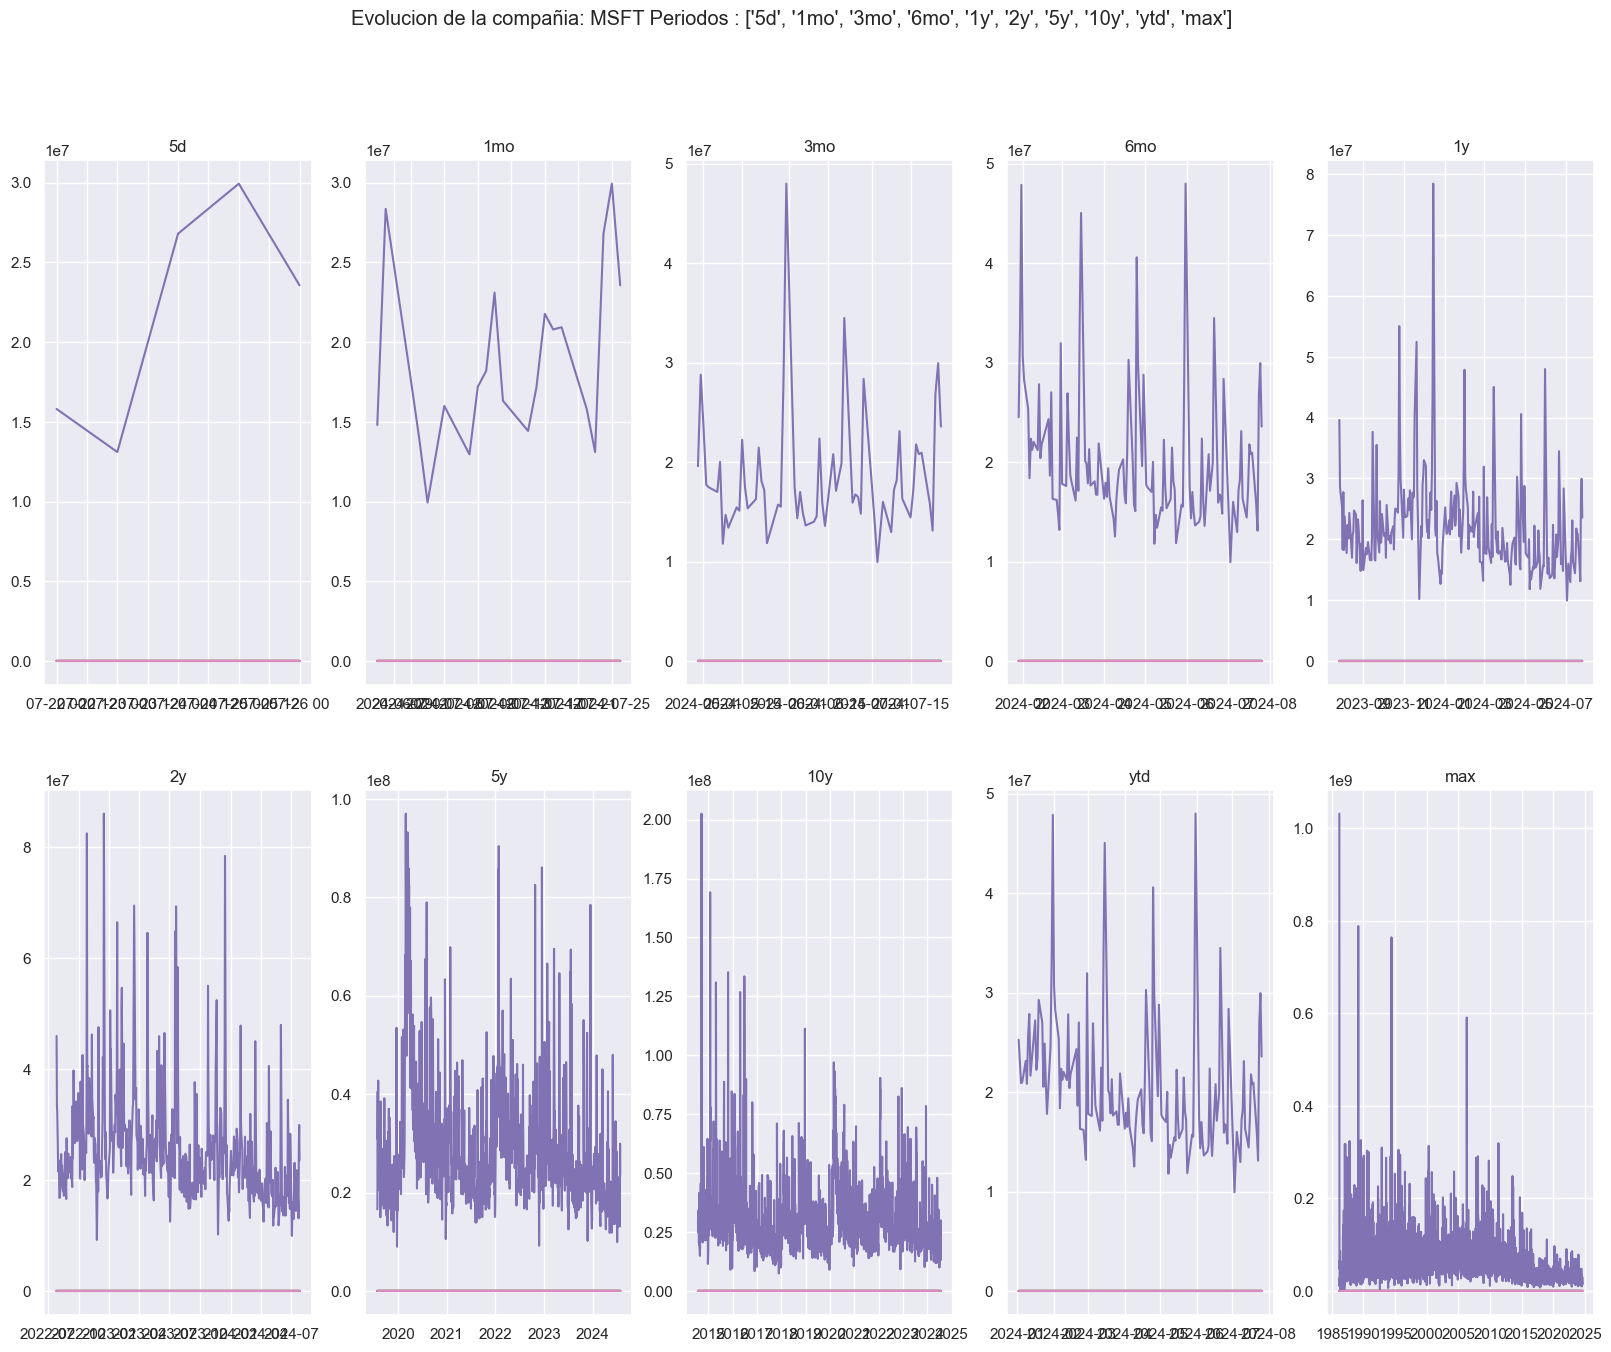

In [32]:
#GRAFICO COMPUESTO QUE MUESTRA LA EVOLUCION PARA TODOS LOS PERIODOS DISPONIBLES DE LA ACCION CONSULTADA

ticker = "MSFT"

def ObtenerPeriodoStock(ticker, number): ##PARA TENER EN CONSIDERACION ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
    ticker_ob = yf.Ticker(ticker)
    ## FALTA 
    per = str(number)
    # Revisar que otras opciones tengo
    hist = ticker_ob.history(period=str(per))
    # Se puede hacer un grafico para ver como se ha comportado
    df_hist = pd.DataFrame(data=hist)
    return df_hist

## VISUALIZACION DE DATOS

#CONSTANTES

N_ROWS = 2 # Q Filas
N_COL = 5 # Q Columnas

# Graph
fig,axes=plt.subplots(nrows=N_ROWS,ncols=N_COL,figsize=(20,15),sharex=False, sharey=False)
fig.suptitle("Evolucion de la compañia: "+ ticker +" Periodos : ['5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'] ")

# VISUALIZATION

for i in range(0,N_ROWS):
    if i == 0: #Fast Sol: Se dividen en 2 los ejes asi se pueden informar 
        per = ['5d', '1mo', '3mo', '6mo', '1y']
    else:
        per = ['2y', '5y', '10y', 'ytd', 'max']
    for j in range(0,N_COL):
        axes[i,j].plot(ObtenerPeriodoStock(ticker,per[j]))
        axes[i,j].set_title(per[j])
        #axes[i,j].set_xlim(min(ObtenerPeriodoStock(ticker,per[j]).index),min(ObtenerPeriodoStock(ticker,per[j]).index))
        #axes[i,j].set_ylim(min(ObtenerPeriodoStock(ticker,per[j])['Close']),max(ObtenerPeriodoStock(ticker,per[j])['Close']))

# Hacer una moficacion sobre el subconjunto para considerar las diferentes escalas https://stackoverflow.com/questions/64621237/how-to-use-different-scales-in-a-subplot
# Optimizar el como se muestran las fechas de las en el eje X de las visualizaciones.
# Optimizar el largo de los indices

In [35]:
#INDICA INFORMACION SOBRE DIVIDENDOS / DIVISIONES / GANANCIAS DE CAPITALES.
# # show meta information about the history (requires history() to be called first)
# msft.history_metadata # Indica cuando se actualiza

ticker = "MSFT" # EL CODIGO SE PUEDE CONSULTAR EN
msft = yf.Ticker("MSFT")

# # show actions (dividends, splits, capital gains)
actions = pd.DataFrame(data=msft.actions)
print(actions)
# msft.dividends
dividends = pd.DataFrame(data=msft.dividends)
print(dividends)
# msft.splits
splits = pd.DataFrame(data=msft.splits)
print(splits)
# msft.capital_gains  # only for mutual funds & etfs
cap_gains = pd.DataFrame(data=msft.capital_gains)
print(cap_gains)


                           Dividends  Stock Splits
Date                                              
1987-09-21 00:00:00-04:00       0.00           2.0
1990-04-16 00:00:00-04:00       0.00           2.0
1991-06-27 00:00:00-04:00       0.00           1.5
1992-06-15 00:00:00-04:00       0.00           1.5
1994-05-23 00:00:00-04:00       0.00           2.0
...                              ...           ...
2023-05-17 00:00:00-04:00       0.68           0.0
2023-08-16 00:00:00-04:00       0.68           0.0
2023-11-15 00:00:00-05:00       0.75           0.0
2024-02-14 00:00:00-05:00       0.75           0.0
2024-05-15 00:00:00-04:00       0.75           0.0

[91 rows x 2 columns]
                           Dividends
Date                                
2003-02-19 00:00:00-05:00       0.08
2003-10-15 00:00:00-04:00       0.16
2004-08-23 00:00:00-04:00       0.08
2004-11-15 00:00:00-05:00       3.08
2005-02-15 00:00:00-05:00       0.08
...                              ...
2023-05-17 00:00:0

In [48]:
# # show share count
msft.get_shares_full(start="2022-01-01", end=None)

# # show financials:
# # - income statement
msft.income_stmt

msft.quarterly_income_stmt

# # # - balance sheet
msft.balance_sheet

msft.quarterly_balance_sheet
# # # - cash flow statement 
msft.cashflow

msft.quarterly_cashflow

# see `Ticker.get_income_stmt()` for more options

,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Ordinary Shares Number,7433000000.0,7431612107.0,7431000000.0,7432000000.0,7437000000.0,NaN
Share Issued,7433000000.0,7431612107.0,7431000000.0,7432000000.0,7437000000.0,NaN
Net Debt,45808000000.0,56914000000.0,NaN,12533000000.0,21648000000.0,32470000000.0
Total Debt,79911000000.0,88374000000.0,84989000000.0,59965000000.0,60522000000.0,NaN
Tangible Book Value,105161000000.0,89441000000.0,144029000000.0,128971000000.0,116864000000.0,NaN
Invested Capital,318594000000.0,312487000000.0,292216000000.0,253460000000.0,242893000000.0,NaN
Working Capital,28655000000.0,26377000000.0,82794000000.0,80108000000.0,78198000000.0,NaN
Net Tangible Assets,105161000000.0,89441000000.0,144029000000.0,128971000000.0,116864000000.0,NaN
Capital Lease Obligations,14469000000.0,14155000000.0,13487000000.0,12728000000.0,12312000000.0,NaN
Common Stock Equity,253152000000.0,238268000000.0,220714000000.0,206223000000.0,194683000000.0,NaN


In [40]:
# # show holders
msft.major_holders
msft.institutional_holders
msft.mutualfund_holders
msft.insider_transactions
msft.insider_purchases
msft.insider_roster_holders


Breakdown                          Value
insidersPercentHeld              0.00050
institutionsPercentHeld          0.73573
institutionsFloatPercentHeld     0.73610
institutionsCount             6825.00000


,Date Reported,Holder,pctHeld,Shares,Value
0,2023-06-30,Vanguard Group Inc,0.0879,653247546,222456919314
1,2023-06-30,Blackrock Inc.,0.0722,536245027,182612881494
2,2023-06-30,State Street Corporation,0.0395,293614078,99987338122
3,2023-06-30,"FMR, LLC",0.0283,210111250,71551285075
4,2023-06-30,Price (T.Rowe) Associates Inc,0.0215,159904219,54453782738
5,2023-06-30,"Geode Capital Management, LLC",0.0199,148129470,50444009713
6,2023-06-30,Morgan Stanley,0.0166,123498322,42056118573
7,2023-06-30,JP Morgan Chase & Company,0.0152,113024837,38489477991
8,2022-12-31,Norges Bank Investment Management,0.0116,86316926,20700525193
9,2023-06-30,Capital World Investors,0.0115,85507261,29118642660


In [49]:
# show recommendations
msft.recommendations
msft.recommendations_summary
msft.upgrades_downgrades


,Firm,ToGrade,FromGrade,Action
GradeDate,,,,
2024-07-23 09:10:13,Piper Sandler,Overweight,Overweight,reit
2024-07-18 10:39:12,TD Cowen,Buy,Buy,main
2024-07-17 12:40:27,B of A Securities,Buy,Buy,main
2024-07-16 11:44:18,Mizuho,Outperform,Outperform,main
2024-07-12 17:57:32,Piper Sandler,Overweight,Overweight,main
2024-07-12 11:30:59,BMO Capital,Outperform,Outperform,main
2024-07-09 16:41:07,Argus Research,Buy,Buy,main
2024-06-21 14:28:00,Citigroup,Buy,Buy,main
2024-06-17 15:50:02,Truist Securities,Buy,Buy,main
